## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import nltk

## Importing Data

In [114]:
data = pd.read_csv('D:/Distance Learning Courses/Predictive Analytics and Machine Learning/yelp.csv')
print(data.shape)

(10000, 10)


## Basic Data Exploration

In [115]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [117]:
for col in data.columns:
    print(col.ljust(30),': ',len(data[col].unique()),'labels'.ljust(10),' : ',data[col].dtype)

business_id                    :  4174 labels      :  object
date                           :  1995 labels      :  object
review_id                      :  10000 labels      :  object
stars                          :  5 labels      :  int64
text                           :  9998 labels      :  object
type                           :  1 labels      :  object
user_id                        :  6403 labels      :  object
cool                           :  29 labels      :  int64
useful                         :  28 labels      :  int64
funny                          :  29 labels      :  int64


## Dropping Unnecessary Columns

In [118]:
data = data.drop(['review_id'],axis = 1)
data = data.drop(['type'],axis = 1)

## Plotting to get a sense of data
### Box Plot and Count Plot

<AxesSubplot:xlabel='stars'>

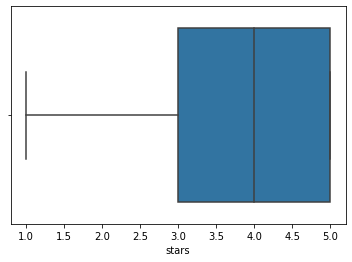

In [119]:
sns.boxplot(data=data,x=data['stars'])

<AxesSubplot:xlabel='cool', ylabel='count'>

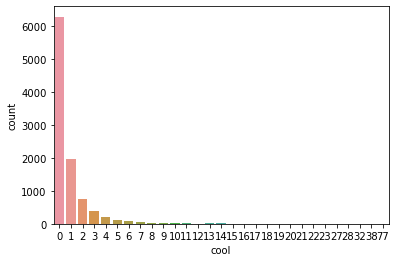

In [120]:
sns.countplot(data=data,x=data['cool'])

<AxesSubplot:xlabel='useful', ylabel='count'>

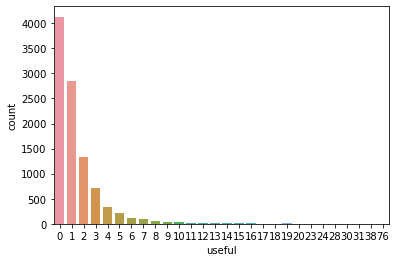

In [121]:
sns.countplot(data=data,x=data['useful'])

<AxesSubplot:xlabel='funny', ylabel='count'>

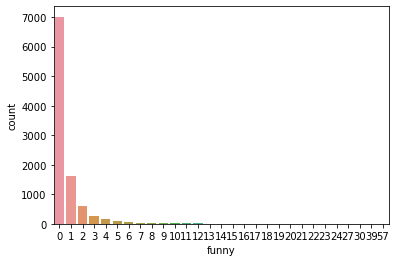

In [122]:
sns.countplot(data=data,x=data['funny'])

## Count of values for each star

In [145]:
data['stars'].value_counts()


4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

## Checking NULL values

In [146]:
count=data.isna().sum()
count

business_id             0
date                    0
stars                   0
text                    0
user_id                 0
cool                    0
useful                  0
funny                   0
body_text_clean         0
body_text_tokenized     0
body_text_nostop        0
body_text_lemmatized    0
text1                   0
dtype: int64

## Making a new dataframe with feature and label

In [147]:
data1 = pd.DataFrame(data,columns = ['text','stars'])
data1.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


## Removing Punctuations

In [148]:
import string
string.punctuation

def remove_punct (text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation ])
    return text_nopunct

data1['body_text_clean'] = data1['text'].apply(lambda x:remove_punct(x))

## Tokenizing

In [154]:
import re 
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens

data1['body_text_tokenized'] = data1['body_text_clean'].apply(lambda x:tokenize(x.lower()))
data1['body_text_tokenized'].head()

0    [my, wife, took, me, here, on, my, birthday, f...
1    [i, have, no, idea, why, some, people, give, b...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosie, dakota, and, i, love, chaparral, dog, ...
4    [general, manager, scott, petello, is, a, good...
Name: body_text_tokenized, dtype: object

## Removing Stopwords

In [155]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stop_words]
    return text

data1['body_text_nostop'] = data1['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data1['body_text_nostop'].head()

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, rice, good, also, dig, can...
3    [rosie, dakota, love, chaparral, dog, park, co...
4    [general, manager, scott, petello, good, egg, ...
Name: body_text_nostop, dtype: object

## Lemmatizing

In [158]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data1['body_text_lemmatized'] = data1['body_text_nostop'].apply(lambda x:lemmatizing(x))
data1['body_text_lemmatized'].head()

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, review, place, go, s...
2    [love, gyro, plate, rice, good, also, dig, can...
3    [rosie, dakota, love, chaparral, dog, park, co...
4    [general, manager, scott, petello, good, egg, ...
Name: body_text_lemmatized, dtype: object

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error



def clean_text (text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stop_words]
    return text


count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data1['body_text_clean'])


## Visualizing most common words

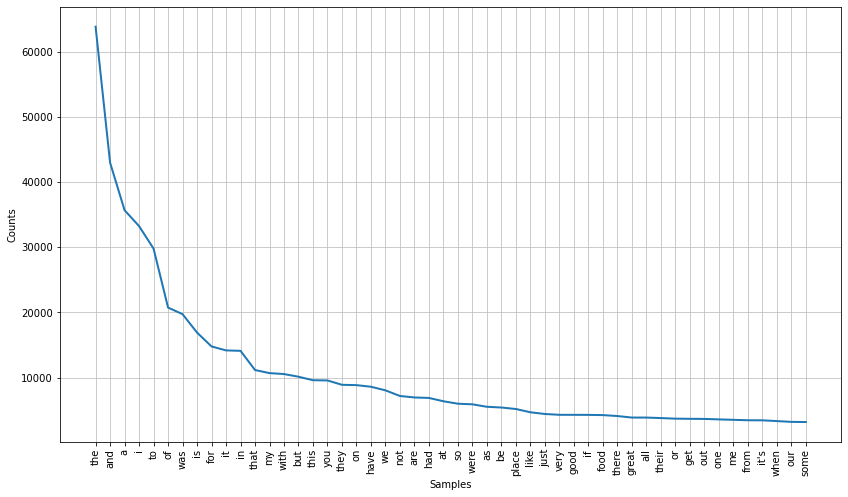

[('the', 63808),
 ('and', 42959),
 ('a', 35667),
 ('i', 33228),
 ('to', 29781),
 ('of', 20737),
 ('was', 19727),
 ('is', 16905),
 ('for', 14778),
 ('it', 14170)]

In [162]:
import string
plt.figure(figsize = (14,8))
txt = " ".join(data1['text'])
words = txt.translate(string.punctuation).lower().split()
fd = nltk.FreqDist(words)
fd.plot(50,cumulative = False)

fd.most_common(10)

## Finding most common words

In [163]:
from nltk.corpus import stopwords
import re
word_list = []
i=0

for txt in data1['text']:
    w_list = re.sub(r'[^s-z]',' ',txt.lower()).split()
    data1.loc[i, 'text1'] = ' '.join(w_list)
    w_list = [w for w in w_list if w not in stopwords.words('english')]
    word_list += w_list
    i+=1
    
    
all_words_fd = nltk.FreqDist(word_list)
word_common = all_words_fd.most_common(3000)
word_features = [w[0] for w in word_common]
print(word_common[0:5])
print(word_features[0:10])

[('w', 122222), ('u', 88280), ('v', 64336), ('st', 36200), ('ut', 24888)]
['w', 'u', 'v', 'st', 'ut', 'us', 'ss', 'x', 'tt', 'ts']


## Splitting data into training and testing dataset

In [160]:
X = data1['text']
cv = CountVectorizer()
X = cv.fit_transform(X)
Y = data1['stars']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=35)

## Importing Training Model and Training on the dataset and Fitting the classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

## Making predictions

In [169]:
y_test_pred = mnb.predict(X_test)
y_test_pred

array([5, 1, 4, ..., 4, 4, 4], dtype=int64)

## Finding features 

In [138]:
def find_feature(document):
    features = {}
    words = document.split()
    for w in word_common:
        features[w[0]]=(w[0] in words)
    return features

Feature_set = []
for i, row in enumerate(data.values):
    q,label,text,text_len,text1,q,q,q,q,q,q,q,q= row
    Feature_set.append((find_feature(text1),label))
    
    
print (Feature_set[0][1])
print(len(Feature_set[0][0]))
Feature_set[0][0]

    

2011-01-26
212


{'w': False,
 'u': False,
 'v': False,
 'st': False,
 'ut': False,
 'us': False,
 'ss': False,
 'x': False,
 'tt': False,
 'ts': False,
 'su': False,
 'ust': False,
 'z': False,
 'tu': False,
 'ty': False,
 'ys': False,
 'tw': False,
 'xt': False,
 'tty': False,
 'zz': False,
 'yt': False,
 'sty': False,
 'sw': False,
 'stu': False,
 'ws': False,
 'uts': False,
 'uy': False,
 'yu': False,
 'sy': False,
 'usu': False,
 'utt': False,
 'sus': False,
 'tts': False,
 'yw': False,
 'usy': False,
 'ssu': False,
 'sts': False,
 'zy': False,
 'vy': False,
 'uys': False,
 'ttu': False,
 'tz': False,
 'uss': False,
 'tv': False,
 'xtu': False,
 'ux': False,
 'utst': False,
 'ssy': False,
 'yst': False,
 'utu': False,
 'wy': False,
 'syst': False,
 'wt': False,
 'zu': False,
 'www': False,
 'vs': False,
 'uzz': False,
 'tut': False,
 'tst': False,
 'uv': False,
 'tvs': False,
 'tus': False,
 'xy': False,
 'uz': False,
 'uty': False,
 'usty': False,
 'uxu': False,
 'tsu': False,
 'uu': False,
 'xu'

In [170]:
print (Feature_set[0][1])

2011-01-26


## Defining Train Set and Test Set

In [171]:
train_set = Feature_set[:3000]
test_set  = Feature_set[3000:]

## Fitting a Classifier

In [172]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

## Finding the accuracy of the data.

In [ ]:
print(nltk.classify.accuracy(classifier,test_set)*100)